# Predicting Stock Market Data with Daily News Headlines

In [8]:
import pandas as pd
import numpy as np
import nltk
import spacy
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

## Importing Data

In [3]:
data_DJIA = pd.read_csv(r'C:\Users\ruthv\stocknews\upload_DJIA_table.csv')

In [4]:
data_news = pd.read_csv(r'C:\Users\ruthv\stocknews\combined_News_DJIA.csv')

In [5]:
data_news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [9]:
data_DJIA.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [10]:
print("Length of DJIA:",len(data_DJIA),"\n\n","Length of Combined News:",len(data_news))

Length of DJIA: 1989 

 Length of Combined News: 1989


In [11]:
print("News info")
print(data_news.info())

News info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
Date     1989 non-null object
Label    1989 non-null int64
Top1     1989 non-null object
Top2     1989 non-null object
Top3     1989 non-null object
Top4     1989 non-null object
Top5     1989 non-null object
Top6     1989 non-null object
Top7     1989 non-null object
Top8     1989 non-null object
Top9     1989 non-null object
Top10    1989 non-null object
Top11    1989 non-null object
Top12    1989 non-null object
Top13    1989 non-null object
Top14    1989 non-null object
Top15    1989 non-null object
Top16    1989 non-null object
Top17    1989 non-null object
Top18    1989 non-null object
Top19    1989 non-null object
Top20    1989 non-null object
Top21    1989 non-null object
Top22    1989 non-null object
Top23    1988 non-null object
Top24    1986 non-null object
Top25    1986 non-null object
dtypes: int64(1), object(26)
memory usage: 419.7+ KB
None


## Data Preprocessing

In [12]:
data_news = data_news.apply(lambda x: x.astype(str).str.lower())

In [13]:
date_news = data_news["Date"]
label_news = data_news['Label']

In [14]:
del data_news['Date']
del data_news["Label"]

In [15]:
data_news = data_news.apply(lambda x: x.astype(str).str[1:])
data_news = data_news.apply(lambda x: x.astype(str).str.replace('[^\w\s]',''))
data_news['combined'] = data_news['Top1'] + ' ' + data_news['Top2'] + ' ' + data_news['Top3'] + ' ' + data_news['Top4'] + ' ' + data_news['Top5'] + ' ' + data_news['Top6'] + ' ' + data_news['Top7'] + ' ' + data_news['Top8'] + ' ' + data_news['Top9'] + ' ' + data_news['Top10'] + ' ' + data_news['Top11'] + ' ' + data_news['Top12'] + ' ' + data_news['Top13'] + ' ' + data_news['Top14'] + ' ' + data_news['Top15'] + ' ' + data_news['Top16'] + ' ' + data_news['Top17'] + ' ' + data_news['Top18'] + ' ' + data_news['Top19'] + ' ' + data_news['Top20'] + ' ' + data_news['Top21'] + ' ' + data_news['Top22'] + ' ' + data_news['Top23'] + ' ' + data_news['Top24'] + ' ' + data_news['Top25']

In [16]:
del data_news['Top1']
del data_news['Top2']
del data_news['Top3']
del data_news['Top4']
del data_news['Top5']
del data_news['Top6']
del data_news['Top7']
del data_news['Top8']
del data_news['Top9']
del data_news['Top10']
del data_news['Top11']
del data_news['Top12']
del data_news['Top13']
del data_news['Top14']
del data_news['Top15']
del data_news['Top16']
del data_news['Top17']
del data_news['Top18']
del data_news['Top19']
del data_news['Top20']
del data_news['Top21']
del data_news['Top22']
del data_news['Top23']
del data_news['Top24']
del data_news['Top25']

In [17]:
data_news['Date'] = date_news
data_news['Label'] = label_news

In [18]:
data_news.head()

,combined,Date,Label
0,georgia downs two russian warplanes as countri...,2008-08-08,0
1,why wont america and nato help us if they wont...,2008-08-11,1
2,remember that adorable 9yearold who sang at th...,2008-08-12,0
3,us refuses israel weapons to attack iran repo...,2008-08-13,0
4,all the experts admit that we should legalise ...,2008-08-14,1


In [19]:
data_DJIA.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [20]:
data_DJIA.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [21]:
print(len(data_DJIA))

1989


In [22]:
data_DJIA.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [23]:
import seaborn as sns
sns.pairplot(data_DJIA)

## Preprocessing the parameters for model fitting

In [25]:
# import matplotlib.pyplot as plt

# # plt.scatter(x=data_DJIA['Date'],y = data_DJIA['Open'])
# # plt.show()

In [26]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [27]:
# Train test split

train_data_DJIA = data_DJIA[data_DJIA['Date']<'2014-07-15']
test_data_DJIA = data_DJIA[data_DJIA['Date']>='2014-07-15']

In [28]:
print("Train test split: ", str((len(train_data_DJIA)/len(data_DJIA))*100)+"%")

Train test split:  75.01256913021619%


In [29]:
y_train_DJIA = train_data_DJIA['Open']
y_test_DJIA = test_data_DJIA['Open']

In [30]:
del train_data_DJIA['Open']
del train_data_DJIA['Date']
del test_data_DJIA['Open']
del test_data_DJIA['Date']

In [31]:
col_names = ['High','Low','Close','Volume','Adj Close']

s_scaler = StandardScaler()
scaled = {}

for i in col_names:
    
    scaled[i] = (train_data_DJIA[i])/max(train_data_DJIA[i])


scaled_train = pd.DataFrame(scaled, columns=col_names)

In [32]:
y_train_scaled =  (y_train_DJIA)/max(y_train_DJIA)
y_test_scaled = (y_test_DJIA)/max((y_test_DJIA))
ymax = np.max(y_test_DJIA)
print(scaled_train,"\n\n",y_train_scaled)

          High       Low     Close    Volume  Adj Close
497   1.000000  0.997557  0.999248  0.089744   0.999248
498   0.991868  0.992223  0.992709  0.090381   0.992709
499   0.993675  0.988991  0.991025  0.100027   0.991025
500   0.994764  0.995372  0.995158  0.099449   0.995158
501   0.996118  0.993076  0.990530  0.111495   0.990530
...        ...       ...       ...       ...        ...
1984  0.685744  0.673881  0.680557  0.236754   0.680557
1985  0.680799  0.674025  0.675696  0.270477   0.675696
1986  0.689493  0.682746  0.682112  0.257201   0.682112
1987  0.694453  0.687101  0.690308  0.271425   0.690308
1988  0.688183  0.670182  0.687494  0.315341   0.687494

[1492 rows x 5 columns] 

 497     0.993384
498     0.991472
499     0.995108
500     0.991385
501     0.997554
          ...   
1984    0.675820
1985    0.681723
1986    0.690449
1987    0.687400
1988    0.669960
Name: Open, Length: 1492, dtype: float64


In [33]:
print(ymax)

18315.060547


## Fitting a linear regression model

In [34]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(scaled_train,y_train_scaled)

score = cross_val_score(lin_reg, scaled_train,y_train_scaled,cv = 10)

print(score.mean())

0.9866609530722761


In [35]:
#To retrieve the intercept:
print(lin_reg.intercept_)
#For retrieving the slope:
print(lin_reg.coef_)

5.523454625755431e-05
[ 0.96437377  0.77335304 -0.37008316 -0.00127095 -0.37008316]


In [36]:
coeff_df = pd.DataFrame(lin_reg.coef_, scaled_train.columns, columns=['Coefficient'])  
print("Coefficients:\n" ,coeff_df)

Coefficients:
            Coefficient
High          0.964374
Low           0.773353
Close        -0.370083
Volume       -0.001271
Adj Close    -0.370083


In [37]:
scaled2 = {}

for i in col_names:
    scaled2[i] = test_data_DJIA[i]/max(test_data_DJIA[i])

scaled_test = pd.DataFrame(scaled2, columns=col_names)


In [38]:
y_pred = lin_reg.predict(scaled_test)

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_scaled, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_scaled, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred)))
print('R squared:', metrics.r2_score(y_test_scaled,y_pred))

Mean Absolute Error: 0.003198882958267772
Mean Squared Error: 1.7901606351714285e-05
Root Mean Squared Error: 0.004231028994430821
R squared: 0.983716977433658


## Fitting a ridge regression model

In [40]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(scaled_train,y_train_scaled)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
print(ridge.intercept_)
coeff_df = pd.DataFrame(ridge.coef_, scaled_train.columns, columns=['Coefficient'])  
print("Coefficients:\n" ,coeff_df)

0.012077834844824387
Coefficients:
            Coefficient
High          0.265172
Low           0.259864
Close         0.229993
Volume       -0.007222
Adj Close     0.229993


In [42]:
score_ridge = cross_val_score(ridge, scaled_train,y_train_scaled,cv=10)

print(score_ridge)

[0.90972336 0.93251013 0.98694481 0.939089   0.95106521 0.95231113
 0.9658229  0.93434032 0.97842525 0.9801994 ]


In [43]:
scaled2 = {}

for i in col_names:
    scaled2[i] = (test_data_DJIA[i])/max(test_data_DJIA[i])

scaled_test = pd.DataFrame(scaled2, columns=col_names)

y_pred_ridge = ridge.predict(scaled_test)

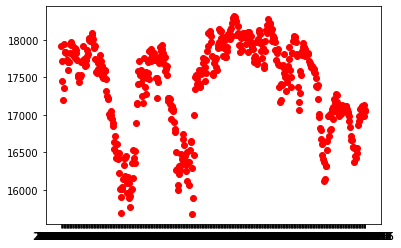

In [44]:
df = pd.DataFrame({'Actual': y_test_scaled*ymax, 'Predicted': y_pred_ridge*ymax})
df['Date'] = data_DJIA['Date'] 
plt.scatter(x= df['Date'],y = df['Actual'], color = 'r')
plt.show()

In [45]:
df.head()

,Actual,Predicted,Date
0,17924.240234,17893.350341,2016-07-01
1,17712.759766,17801.751007,2016-06-30
2,17456.019531,17572.414095,2016-06-29
3,17190.509766,17292.973502,2016-06-28
4,17355.210938,17116.023423,2016-06-27


In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_scaled, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_scaled, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred)))
print('R squared:', metrics.r2_score(y_test_scaled,y_pred))

Mean Absolute Error: 0.003198882958267772
Mean Squared Error: 1.7901606351714285e-05
Root Mean Squared Error: 0.004231028994430821
R squared: 0.983716977433658


## Testing on current data

In [47]:
# data_DJIA_new = pd.read_csv(r'C:\Users\ruthv\Downloads\^DJI.csv')

In [48]:
# data_test = data_DJIA_new[data_DJIA_new['Date']>'2019-01-01']

In [49]:
# y_test1 = data_test['Open']
# y_test1

In [50]:
# col_names = ['High','Low','Close','Volume','Adj Close']


In [51]:
# # y_test_scaled_1 = y_test1/max(y_test1)
# ymax = max(y_test1)

In [52]:
# scaled2 = s_scaler.transform(data_test)
# scaled_test = pd.DataFrame(scaled2, columns=col_names)

# y_pred_ridge = ridge.predict(data_test)

In [53]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_scaled, y_pred_ridge))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test_scaled, y_pred_ridge))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred_ridge)))
# print('R squared:', metrics.r2_score(y_test_scaled,y_pred_ridge))

## Checking for Stationarity

In [6]:
from datetime import datetime
data_DJIA2 = data_DJIA.copy()
print(data_DJIA2.head())

cols = ['Date', 'Open']

index_data = {}
for i in cols:
    index_data[i] = data_DJIA2[i]
    
index_data = pd.DataFrame(index_data, columns = cols) 
print(type(data_DJIA2))
print(type(index_data))

data_DJIA2['Date'] = pd.to_datetime(data_DJIA2['Date'], infer_datetime_format = True)
index_DJIA = data_DJIA2.set_index(['Date'])
index_data['Date'] = pd.to_datetime(index_data['Date'],infer_datetime_format = True)
index_data = index_data.set_index(['Date'])
print(index_DJIA.head())
print(index_data.head())



         Date          Open          High           Low         Close  \
0  2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1  2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2  2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3  2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4  2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   

      Volume     Adj Close  
0   82160000  17949.369141  
1  133030000  17929.990234  
2  106380000  17694.679688  
3  112190000  17409.720703  
4  138740000  17140.240234  
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
                    Open          High           Low         Close     Volume  \
Date                                                                            
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   82160000   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234  

### Methods used:

### 1. Rolling Statistics
### 2. Dicky-Fuller Test

C:\Users\ruthv\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


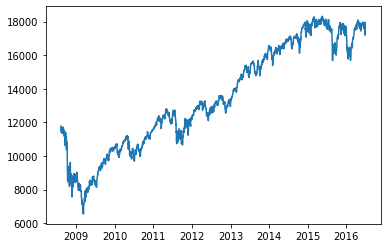

In [9]:
# Movement of Open prices

plt.plot(index_data)

### Rolling mean and std deviation

In [10]:
rolmean = index_data.rolling(window=366).mean()
rolstd = index_data.rolling(window=366).std()
print("Rolling mean : ", rolmean, "\n\n Rolling Std: ", rolstd)

Rolling mean :                     Open
Date                   
2016-07-01          NaN
2016-06-30          NaN
2016-06-29          NaN
2016-06-28          NaN
2016-06-27          NaN
...                 ...
2008-08-14  9164.380280
2008-08-13  9168.310662
2008-08-12  9172.644953
2008-08-11  9176.892413
2008-08-08  9179.740800

[1989 rows x 1 columns] 

 Rolling Std:                     Open
Date                   
2016-07-01          NaN
2016-06-30          NaN
2016-06-29          NaN
2016-06-28          NaN
2016-06-27          NaN
...                 ...
2008-08-14  1158.503115
2008-08-13  1164.431816
2008-08-12  1171.197900
2008-08-11  1177.644513
2008-08-08  1181.838994

[1989 rows x 1 columns]


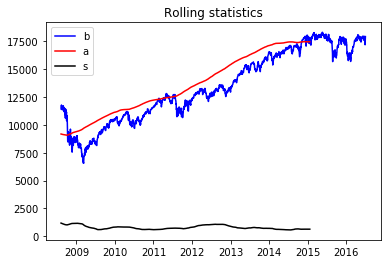

In [14]:
orig = plt.plot(index_data, color= 'blue', label='original')
mean = plt.plot(rolmean, color = 'red', label = 'rolling mean')
std = plt.plot(rolstd,color = 'black', label = 'rolling standard dev' )
plt.legend('basic')
plt.title('Rolling statistics')
plt.show(block=False)

In [12]:
from statsmodels.tsa.stattools import adfuller

print("Results of Dicky Fuller test:")
dftest = adfuller(index_data['Open'],autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags used','Number of observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
    
print(dfoutput)

Results of Dicky Fuller test:
Test Statistic                   -1.315485
p-value                           0.622059
#Lags used                       20.000000
Number of observations used    1968.000000
Critical Value(1%)               -3.433677
Critical Value(5%)               -2.863010
Critical Value(10%)              -2.567552
dtype: float64


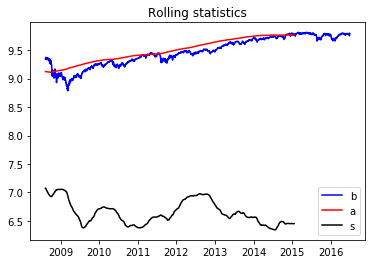

In [13]:
index_data_logscale = np.log(index_data)
rolmean_logscale = np.log(rolmean)
rolstd_logscale = np.log(rolstd)
orig = plt.plot(index_data_logscale, color= 'blue', label='original')
mean = plt.plot(rolmean_logscale, color = 'red', label = 'rolling mean')
std = plt.plot(rolstd_logscale,color = 'black', label = 'rolling standard dev' )
plt.legend('basic')
plt.title('Rolling statistics')
plt.show(block=False)

## Fitting an LSTM model to predict open data

In [60]:
#pip install --user pmdarima

In [138]:
from keras.layers.core import Dense,Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time

In [139]:
array = index_data.values.reshape(index_data.shape[0],1)
array[:5]

array([[17924.240234],
       [17712.759766],
       [17456.019531],
       [17190.509766],
       [17355.210938]])

In [140]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
array = scl.fit_transform(array)
array[:5]

array([[0.96678972],
       [0.94881899],
       [0.92700227],
       [0.90444035],
       [0.91843597]])

In [141]:
#train-test split
look_back = 40
forward_days = 10
num_periods = 20

division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]

In [142]:
#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [143]:
X_test,y_test = processData(array_test,look_back,forward_days,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [144]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(1392, 40, 1)
(348, 40, 1)
(20, 40, 1)
(1392, 10)
(348, 10)
(20, 10)


In [145]:

NUM_NEURONS_FirstLayer = 50
NUM_NEURONS_SecondLayer = 30
EPOCHS = 20

#Build the model
model = Sequential()

model.add(LSTM(
    NUM_NEURONS_FirstLayer,
    input_shape=(look_back,1),
    return_sequences=True))

model.add(LSTM(
    NUM_NEURONS_SecondLayer,
    input_shape=(NUM_NEURONS_FirstLayer,1)))

model.add(Dense(forward_days))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,
                    epochs=EPOCHS,
                    validation_data=(X_validate,y_validate),
                    shuffle=True,batch_size=2, verbose=2)

Train on 1392 samples, validate on 348 samples
Epoch 1/20
 - 18s - loss: 0.0099 - val_loss: 0.0010
Epoch 2/20
 - 16s - loss: 0.0014 - val_loss: 0.0016
Epoch 3/20
 - 15s - loss: 0.0014 - val_loss: 0.0025
Epoch 4/20
 - 15s - loss: 0.0011 - val_loss: 7.9162e-04
Epoch 5/20
 - 17s - loss: 0.0011 - val_loss: 8.1403e-04
Epoch 6/20
 - 18s - loss: 0.0010 - val_loss: 9.1458e-04
Epoch 7/20
 - 16s - loss: 0.0010 - val_loss: 7.2692e-04
Epoch 8/20
 - 16s - loss: 9.0740e-04 - val_loss: 7.7405e-04
Epoch 9/20
 - 16s - loss: 9.1075e-04 - val_loss: 7.2007e-04
Epoch 10/20
 - 16s - loss: 8.6061e-04 - val_loss: 6.5614e-04
Epoch 11/20
 - 18s - loss: 9.2711e-04 - val_loss: 6.1978e-04
Epoch 12/20
 - 16s - loss: 7.9837e-04 - val_loss: 6.2502e-04
Epoch 13/20
 - 17s - loss: 7.9265e-04 - val_loss: 0.0016
Epoch 14/20
 - 16s - loss: 8.0678e-04 - val_loss: 6.2879e-04
Epoch 15/20
 - 17s - loss: 7.9100e-04 - val_loss: 6.0151e-04
Epoch 16/20
 - 16s - loss: 7.7943e-04 - val_loss: 6.1570e-04
Epoch 17/20
 - 16s - loss: 7.9

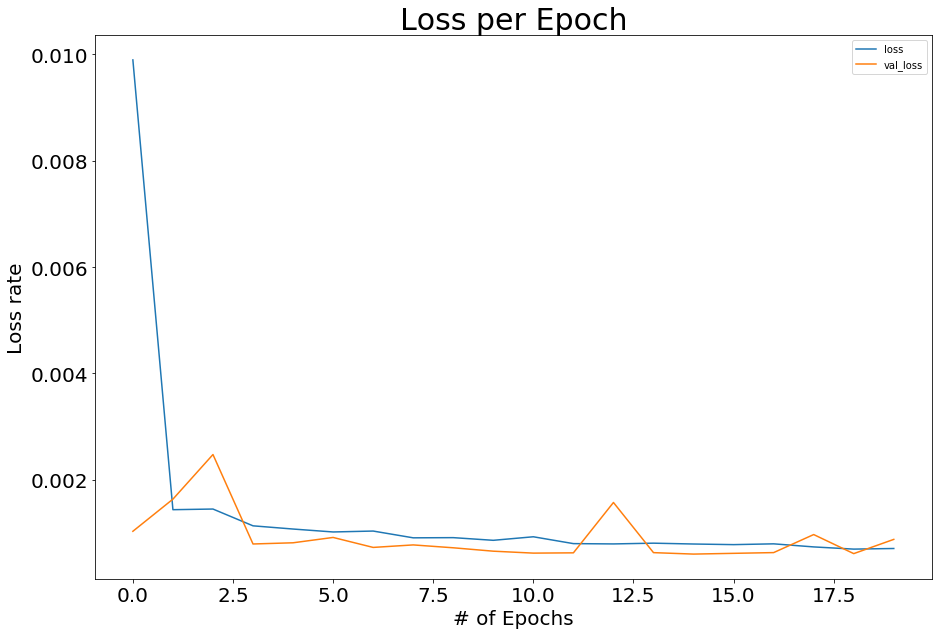

In [159]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.title('Loss per Epoch',fontsize = 30)
plt.ylabel('Loss rate',fontsize=20)
plt.xlabel('# of Epochs', fontsize = 20)
plt.tick_params(axis='both',labelsize = 20)
plt.show()

In [70]:

#Saving the model
file_name = 'Lstm_model_LB{}_FD{}_E{}_F{}_S{}.h5'.format(look_back, forward_days, EPOCHS, NUM_NEURONS_FirstLayer, NUM_NEURONS_SecondLayer)
model.save(file_name)
print("Saved model `{}` to disk".format(file_name))

Saved model `Lstm_model_LB40_FD10_E20_F50_S30.h5` to disk


In [71]:
Xt = model.predict(X_test)

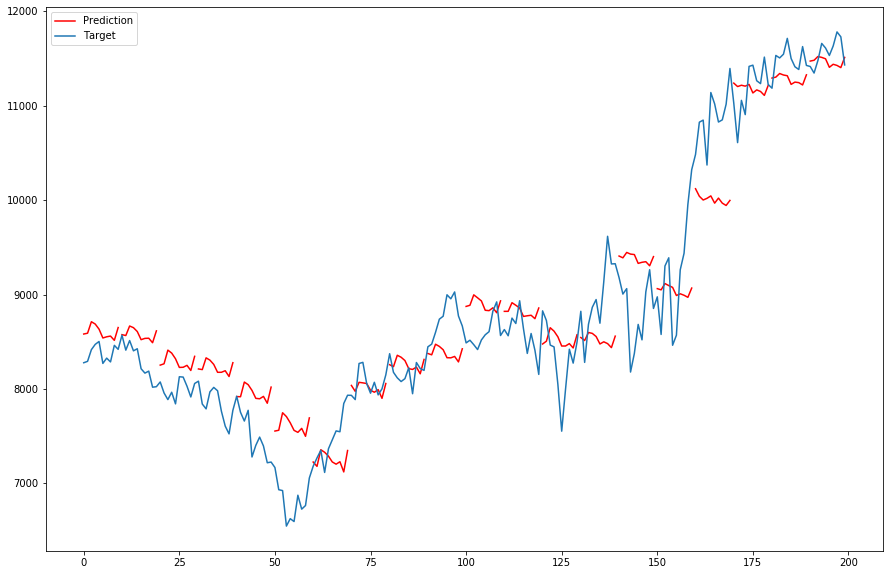

In [72]:
plt.figure(figsize = (15,10))

for i in range(0,len(Xt)):
    plt.plot([x + i*forward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')
    
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction') #only to place the label
    
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()

### Predicting all the data to see how the model reacts to Train and Test set

In [73]:
division = len(array) - num_periods*forward_days

leftover = division%forward_days+1

array_test = array[division-look_back:]
array_train = array[leftover:division]

In [74]:
Xtrain,ytrain = processData(array_train,look_back,forward_days,forward_days)
Xtest,ytest = processData(array_test,look_back,forward_days,forward_days)

In [75]:
Xtrain = model.predict(Xtrain)
Xtrain = Xtrain.ravel()

Xtest = model.predict(Xtest)
Xtest = Xtest.ravel()

In [76]:
y = np.concatenate((ytrain, ytest), axis=0)

ValueError: x and y must have same first dimension, but have shapes (1930,) and (1, 1)

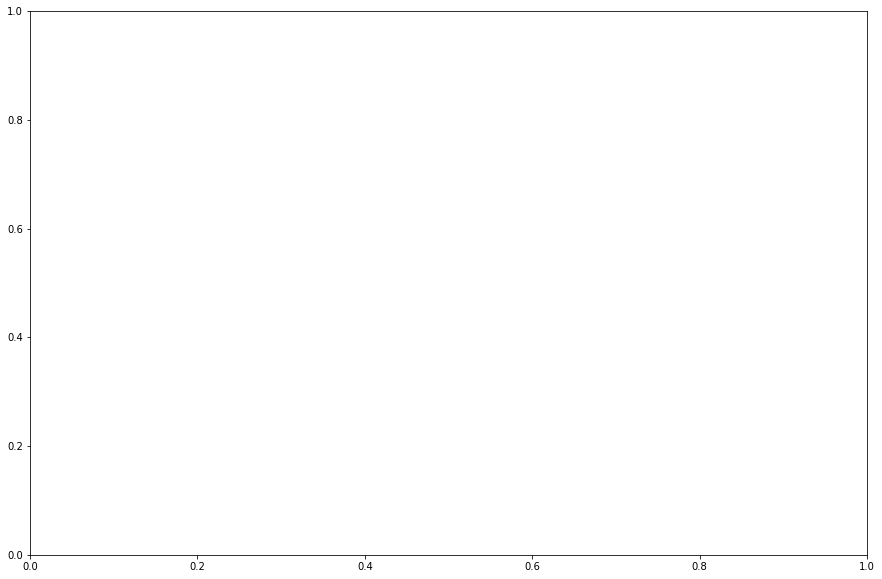

In [136]:
plt.figure(figsize = (15,10))

#Data used
plt.plot([x for x in range(look_back+leftover, look_back+leftover+len(Xtrain)+len(Xtest))], scl.inverse_transform(y.reshape(-1,1)), color='y', label='Target')

# Data in Train/Validation
plt.plot([x for x in range(look_back+leftover, len(Xtrain)+look_back+leftover)], scl.inverse_transform(Xtrain.reshape(-1,1)), color='blue', label='Train')
# Data in Test
plt.plot([x for x in range(look_back +leftover+ len(Xtrain), len(Xtrain)+len(Xtest)+look_back+leftover)], scl.inverse_transform(Xtest.reshape(-1,1)), color='r', label='Test')


#Initial data. It should overlap the data used
#plt.plot(scl.inverse_transform(array), color='b', label='Esperado')

plt.legend(loc='best')
plt.title('Forecasted values',fontsize = 20)
plt.tick_params(axis='both',labelsize = 20)
plt.show()

In [78]:
y_pred = []
for i in range(len(Xt)):
    for j in range(len(Xt[i])):
        y_pred.append(Xt[i][j]) 
y_true = []
for i in range(len(y_test)):
    for j in range(len(Xt[i])):
        y_true.append(y_test[i][j]) 

y_train1 = []
for i in range(len(ytrain)):
    for j in range(len(ytrain[i])):
        y_train1.append(y_train[i][j]) 

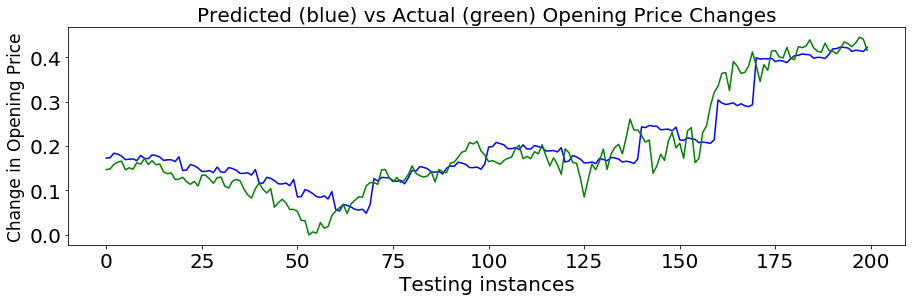

In [154]:
# Plot the predicted (blue) and actual (green) values
plt.figure(figsize=(15,4))
plt.plot(y_pred,color = 'b')
plt.plot(y_true, color = 'g')
plt.title("Predicted (blue) vs Actual (green) Opening Price Changes", fontsize=20)
plt.xlabel("Testing instances",fontsize=20)
plt.ylabel("Change in Opening Price",fontsize=17)

plt.tick_params(axis='both',labelsize = 20)
plt.show()


In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_true, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_true, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('R squared:', metrics.r2_score(y_true,y_pred))

Mean Absolute Error: 0.03068335158881516
Mean Squared Error: 0.0015449799658565277
Root Mean Squared Error: 0.03930623316799166
R squared: 0.883875811252446


# Predicting news using RNN and LSTM

In [81]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras import initializers
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense
from keras.layers import BatchNormalization, Flatten, Reshape, Concatenate
# from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, Merge,                         BatchNormalization, Flatten, Reshape, Concatenate
from keras.layers.recurrent import LSTM, GRU
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers

In [82]:
news = data_news.copy()
stock = data_DJIA.copy()

news = pd.read_csv(r'C:\Users\ruthv\stocknews\RedditNews.csv')

In [83]:
print(len(news))
print(len(stock))

73608
1989


In [84]:
stock = stock[stock.Date.isin(news.Date)]
news = news[news.Date.isin(stock.Date)]

In [85]:
print(len(stock))
print(len(news))

1989
49718


In [86]:
stock = stock.set_index('Date').diff(periods=1)
stock['Date'] = stock.index
stock = stock.reset_index(drop=True)
# Remove unneeded features
stock = stock.drop(['High','Low','Close','Volume','Adj Close'], 1)

In [87]:
print(stock.head())
print(news.head())

         Open        Date
0         NaN  2016-07-01
1 -211.480468  2016-06-30
2 -256.740235  2016-06-29
3 -265.509765  2016-06-28
4  164.701172  2016-06-27
         Date                                               News
0  2016-07-01  A 117-year-old woman in Mexico City finally re...
1  2016-07-01   IMF chief backs Athens as permanent Olympic host
2  2016-07-01  The president of France says if Brexit won, so...
3  2016-07-01  British Man Who Must Give Police 24 Hours' Not...
4  2016-07-01  100+ Nobel laureates urge Greenpeace to stop o...


In [88]:
#Remove null values

stock = stock[stock.Open.notnull()]

In [89]:
stock.isnull().sum()

Open    0
Date    0
dtype: int64

In [90]:
# Create a list of the opening prices and their corresponding daily headlines from the news
price = []
headlines = []

for row in stock.iterrows():
    daily_headlines = []
    date = row[1]['Date']
    price.append(row[1]['Open'])
    for row_ in news[news.Date==date].iterrows():
        daily_headlines.append(row_[1]['News'])
    
    # Track progress
    headlines.append(daily_headlines)
    if len(price) % 500 == 0:
        print(len(price))

500
1000
1500


In [91]:
print(len(price))
print(len(headlines))
print(headlines[0])

1988
1988
['Jamaica proposes marijuana dispensers for tourists at airports following legalisation: The kiosks and desks would give people a license to purchase up to 2 ounces of the drug to use during their stay', "Stephen Hawking says pollution and 'stupidity' still biggest threats to mankind: we have certainly not become less greedy or less stupid in our treatment of the environment over the past decade", 'Boris Johnson says he will not run for Tory party leadership', 'Six gay men in Ivory Coast were abused and forced to flee their homes after they were pictured signing a condolence book for victims of the recent attack on a gay nightclub in Florida', 'Switzerland denies citizenship to Muslim immigrant girls who refused to swim with boys: report', 'Palestinian terrorist stabs israeli teen girl to death in her bedroom', 'Puerto Rico will default on $1 billion of debt on Friday', 'Republic of Ireland fans to be awarded medal for sportsmanship by Paris mayor.', "Afghan suicide bomber 'k

In [92]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [93]:
print(max(len(i) for i in headlines))
print(min(len(i) for i in headlines))
#print(np.mean(len(i) for i in headlines))

25
22


In [94]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'0,0', '00', text) 
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\$', ' $ ', text)
    text = re.sub(r'u s ', ' united states ', text)
    text = re.sub(r'u n ', ' united nations ', text)
    text = re.sub(r'u k ', ' united kingdom ', text)
    text = re.sub(r'j k ', ' jk ', text)
    text = re.sub(r' s ', ' ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r' l g b t ', ' lgbt ', text)
    text = re.sub(r'0km ', '0 km ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [95]:
# Clean the headlines
clean_headlines = []

for daily_headlines in headlines:
    clean_daily_headlines = []
    for headline in daily_headlines:
        clean_daily_headlines.append(clean_text(headline))
    clean_headlines.append(clean_daily_headlines)

In [96]:
# Take a look at some headlines to ensure everything was cleaned well
clean_headlines[0]

['jamaica proposes marijuana dispensers tourists airports following legalisation kiosks desks would give people license purchase 2 ounces drug use stay',
 'stephen hawking says pollution stupidity still biggest threats mankind certainly become less greedy less stupid treatment environment past decade',
 'boris johnson says run tory party leadership',
 'six gay men ivory coast abused forced flee homes pictured signing condolence book victims recent attack gay nightclub florida',
 'switzerland denies citizenship muslim immigrant girls refused swim boys report',
 'palestinian terrorist stabs israeli teen girl death bedroom',
 'puerto rico default $ 1 billion debt friday',
 'republic ireland fans awarded medal sportsmanship paris mayor',
 'afghan suicide bomber kills 40 bbc news',
 'us airstrikes kill least 250 isis fighters convoy outside fallujah official says',
 'turkish cop took istanbul gunman hailed hero',
 'cannabis compounds could treat alzheimer removing plaque forming proteins br

In [97]:
# Find the number of times each word was used and the size of the vocabulary
word_counts = {}

for date in clean_headlines:
    for headline in date:
        for word in headline.split():
            if word not in word_counts:
                word_counts[word] = 1
            else:
                word_counts[word] += 1
            
print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 35190


In [98]:
# Load GloVe's embeddings
embeddings_index = {}
with open(r'C:\Users\ruthv\Glove\glove.twitter.27B.200d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

print('Word embeddings:', len(embeddings_index))

Word embeddings: 1193515


In [99]:
# Find the number of words that are missing from GloVe, and are used more than our threshold.
missing_words = 0
threshold = 10

for word, count in word_counts.items():
    if count > threshold:
        if word not in embeddings_index:
            missing_words += 1
            
missing_ratio = round(missing_words/len(word_counts),4)*100
            
print("Number of words missing from GloVe:", missing_words)
print("Percent of words that are missing from vocabulary: {}%".format(missing_ratio))

Number of words missing from GloVe: 248
Percent of words that are missing from vocabulary: 0.7000000000000001%


In [100]:
# Limit the vocab that we will use to words that appear ≥ threshold or are in GloVe

#dictionary to convert words to integers
vocab_to_int = {} 

value = 0
for word, count in word_counts.items():
    if count >= threshold or word in embeddings_index:
        vocab_to_int[word] = value
        value += 1

# Special tokens that will be added to our vocab
codes = ["<UNK>","<PAD>"]   

# Add codes to vocab
for code in codes:
    vocab_to_int[code] = len(vocab_to_int)

# Dictionary to convert integers to words
int_to_vocab = {}
for word, value in vocab_to_int.items():
    int_to_vocab[value] = word

usage_ratio = round(len(vocab_to_int) / len(word_counts),4)*100

print("Total Number of Unique Words:", len(word_counts))
print("Number of Words we will use:", len(vocab_to_int))
print("Percent of Words we will use: {}%".format(usage_ratio))

Total Number of Unique Words: 35190
Number of Words we will use: 28821
Percent of Words we will use: 81.89999999999999%


In [101]:

# Need to use 200 for embedding dimensions to match GloVe's vectors.
embedding_dim = 200

nb_words = len(vocab_to_int)
# Create matrix with default values of zero
word_embedding_matrix = np.zeros((nb_words, embedding_dim))
for word, i in vocab_to_int.items():
    if word in embeddings_index:
        word_embedding_matrix[i] = embeddings_index[word]
    else:
        # If word not in GloVe, create a random embedding for it
        new_embedding = np.array(np.random.uniform(-1.0, 1.0, embedding_dim))
        embeddings_index[word] = new_embedding
        word_embedding_matrix[i] = new_embedding

# Check if value matches len(vocab_to_int)
print(len(word_embedding_matrix))

28821


In [102]:
# Change the text from words to integers
# If word is not in vocab, replace it with <UNK> (unknown)
word_count = 0
unk_count = 0

int_headlines = []

for date in clean_headlines:
    int_daily_headlines = []
    for headline in date:
        int_headline = []
        for word in headline.split():
            word_count += 1
            if word in vocab_to_int:
                int_headline.append(vocab_to_int[word])
            else:
                int_headline.append(vocab_to_int["<UNK>"])
                unk_count += 1
        int_daily_headlines.append(int_headline)
    int_headlines.append(int_daily_headlines)

unk_percent = round(unk_count/word_count,4)*100

print("Total number of words in headlines:", word_count)
print("Total number of UNKs in headlines:", unk_count)
print("Percent of words that are UNK: {}%".format(unk_percent))

Total number of words in headlines: 615989
Total number of UNKs in headlines: 9089
Percent of words that are UNK: 1.48%


In [103]:
# Find the length of headlines
lengths = []
for date in int_headlines:
    for headline in date:
        lengths.append(len(headline))

# Create a dataframe so that the values can be inspected
lengths = pd.DataFrame(lengths, columns=['counts'])

print(lengths.head())

   counts
0      20
1      19
2       7
3      19
4      10


In [104]:
lengths.describe()

,counts
count,49693.000000
mean,12.395891
std,6.790246
min,1.000000
25%,7.000000
50%,10.000000
75%,16.000000
max,41.000000


In [105]:
# Limit the length of a day's news to 200 words, and the length of any headline to 16 words.
# These values are chosen to not have an excessively long training time and 
# balance the number of headlines used and the number of words from each headline.
max_headline_length = 20
max_daily_length = 200
pad_headlines = []

for date in int_headlines:
    pad_daily_headlines = []
    for headline in date:
        # Add headline if it is less than max length
        if len(headline) <= max_headline_length:
            for word in headline:
                pad_daily_headlines.append(word)
        # Limit headline if it is more than max length  
        else:
            headline = headline[:max_headline_length]
            for word in headline:
                pad_daily_headlines.append(word)
    
    # Pad daily_headlines if they are less than max length
    if len(pad_daily_headlines) < max_daily_length:
        for i in range(max_daily_length-len(pad_daily_headlines)):
            pad = vocab_to_int["<PAD>"]
            pad_daily_headlines.append(pad)
    # Limit daily_headlines if they are more than max length
    else:
        pad_daily_headlines = pad_daily_headlines[:max_daily_length]
    pad_headlines.append(pad_daily_headlines)

In [106]:
# Normalize opening prices (target values)
max_price = max(price)
min_price = min(price)
mean_price = np.mean(price)
def normalize(price):
    return ((price-min_price)/(max_price-min_price))

In [107]:
norm_price = []
for p in price:
    norm_price.append(normalize(p))

In [108]:
# Validating data will be created during training.
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(pad_headlines, norm_price, test_size = 0.15, random_state = 2)

X_train_news = np.array(X_train_news)
X_test_news = np.array(X_test_news)
y_train_news = np.array(y_train_news)
y_test_news = np.array(y_test_news)

X_train_news1, X_val_news, y_train_news1, y_val_news = train_test_split(X_train_news, y_train_news, test_size = 0.15,random_state = 3)

X_train_news1 = np.array(X_train_news1)
X_val_news = np.array(X_val_news)
y_train_news1 = np.array(y_train_news1)
y_val_news = np.array(y_val_news)

In [109]:
# Check the lengths
print(len(X_train_news))
print(len(y_train_news))
print(len(X_test_news))

1689
1689
299


In [110]:
from keras.layers.merge import concatenate

filter_length1 = 3
filter_length2 = 5
dropout = 0.5
learning_rate = 0.001
weights = initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=2)
nb_filter = 16
rnn_output_size = 128
hidden_dims = 128
wider = True
deeper = True

if wider == True:
    nb_filter *= 2
    rnn_output_size *= 2
    hidden_dims *= 2


def build_model(learning_rate, dropout):
    
    model1 = Sequential()
    
    model1.add(Embedding(nb_words, 
                         embedding_dim,
                         weights=[word_embedding_matrix], 
                         input_length=max_daily_length))
    model1.add(Dropout(dropout))
    
    model1.add(Convolution1D(filters = nb_filter, 
                             kernel_size = filter_length1, 
                             padding = 'same',
                            activation = 'relu'))
    model1.add(Dropout(dropout))
    
    if deeper == True:
        model1.add(Convolution1D(filters = nb_filter, 
                                 kernel_size = filter_length1, 
                                 padding = 'same',
                                activation = 'relu'))
        model1.add(Dropout(dropout))
    
    model1.add(LSTM(rnn_output_size, 
                   activation=None,
                   kernel_initializer=weights,
                   dropout = dropout))
    
    model1.add(Dense(1, 
                kernel_initializer = weights,
                name='output'))

    model1.compile(loss='mean_squared_error',
                  optimizer=Adam(lr=learning_rate,clipvalue=1.0))
    
#     ####

#     model2 = Sequential()
    
#     model2.add(Embedding(nb_words, 
#                          embedding_dim,
#                          weights=[word_embedding_matrix], 
#                          input_length=max_daily_length))
#     model2.add(Dropout(dropout))
    
    
#     model2.add(Convolution1D(filters = nb_filter, 
#                              kernel_size = filter_length2, 
#                              padding = 'same',
#                              activation = 'relu'))
#     model2.add(Dropout(dropout))
    
#     if deeper == True:
#         model2.add(Convolution1D(filters = nb_filter, 
#                                  kernel_size = filter_length2, 
#                                  padding = 'same',
#                                  activation = 'relu'))
#         model2.add(Dropout(dropout))
    
#     model2.add(LSTM(rnn_output_size, 
#                     activation=None,
#                     kernel_initializer=weights,
#                     dropout = dropout))
    
#     ####
    
#     # equivalent to added = keras.layers.add([x1, x2])
# # added = keras.layers.Add()([x1, x2])

# # out = keras.layers.Dense(4)(added)
# # model = keras.models.Model(inputs=[input1, input2], outputs=out)

# # concatenated = concatenate([model1_out, model2_out],axis = -1)

# #     out = Dense(1, name='output_layer')

# #     merged_model = Model([model1, model2], out)
# #     merged_model.compile(loss='binary_crossentropy', optimizer='adam', 
# #                     metrics=['accuracy'])



#     model = Sequential()

#     model.add(concatenate([model1, model2],axis=-1))
    
#     model.add(Dense(hidden_dims, kernel_initializer=weights))
#     model.add(Dropout(dropout))
    
#     if deeper == True:
#         model.add(Dense(hidden_dims//2, kernel_initializer=weights))
#         model.add(Dropout(dropout))

#     model.add(Dense(1, 
#                     kernel_initializer = weights,
#                     name='output'))

#     model.compile(loss='mean_squared_error',
#                   optimizer=Adam(lr=learning_rate,clipvalue=1.0))
    return model1


In [111]:
learning_rate = 0.0001
dropout = 0.3
NUM_epochs = 20
batch_size = 128

# model = build_model(learning_rate,dropout)
# print()
# print("Current model: Deeper={}, Wider={}, LR={}, Dropout={}".format(
#                                             deeper,wider,learning_rate,dropout))
# save_best_weights = 'question_pairs_weights_deeper={}_wider={}_lr={}_dropout={}.h5'.format(
#                     deeper,wider,learning_rate,dropout)

# history = model.fit(X_train_news, y_train_news,
#                                     epochs=NUM_epochs,
#                     validation_data=(X_val_news, y_val_news),
#                     shuffle=True,
#                     batch_size = batch_size,
#                     verbose=2)



# Use grid search to help find a better model
for deeper in [False]:
    for wider in [True,False]:
        for learning_rate in [0.001]:
            for dropout in [0.3, 0.5]:
                model = build_model(learning_rate,dropout)
                print()
                print("Current model: Deeper={}, Wider={}, LR={}, Dropout={}".format(
                    deeper,wider,learning_rate,dropout))
                print()
                save_best_weights = 'question_pairs_weights_deeper={}_wider={}_lr={}_dropout={}.h5'.format(
                    deeper,wider,learning_rate,dropout)

                callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True),
                             EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto'),
                             ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1, patience=3)]

                history = model.fit(X_train_news, y_train_news,
                                    epochs=NUM_epochs,
                                validation_data=(X_val_news, y_val_news),
                                shuffle=True,
                                batch_size = batch_size,
                                verbose=2,
                                callbacks = callbacks)
                                


Current model: Deeper=False, Wider=True, LR=0.001, Dropout=0.3



C:\Users\ruthv\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1689 samples, validate on 254 samples
Epoch 1/20
 - 21s - loss: 0.1642 - val_loss: 0.0196
Epoch 2/20
 - 19s - loss: 0.0263 - val_loss: 0.0343
Epoch 3/20
 - 21s - loss: 0.0193 - val_loss: 0.0174
Epoch 4/20
 - 25s - loss: 0.0142 - val_loss: 0.0132
Epoch 5/20
 - 20s - loss: 0.0118 - val_loss: 0.0112
Epoch 6/20
 - 20s - loss: 0.0107 - val_loss: 0.0092
Epoch 7/20
 - 20s - loss: 0.0098 - val_loss: 0.0088
Epoch 8/20
 - 20s - loss: 0.0087 - val_loss: 0.0109
Epoch 9/20
 - 20s - loss: 0.0085 - val_loss: 0.0098
Epoch 10/20
 - 21s - loss: 0.0082 - val_loss: 0.0082
Epoch 11/20
 - 21s - loss: 0.0082 - val_loss: 0.0069
Epoch 12/20
 - 21s - loss: 0.0076 - val_loss: 0.0073
Epoch 13/20
 - 21s - loss: 0.0075 - val_loss: 0.0078
Epoch 14/20
 - 22s - loss: 0.0076 - val_loss: 0.0067
Epoch 15/20
 - 21s - loss: 0.0075 - val_loss: 0.0076
Epoch 16/20
 - 21s - loss: 0.0073 - val_loss: 0.0069
Epoch 17/20
 - 21s - loss: 0.0072 - val_loss: 0.0065
Epoch 18/20
 - 21s - loss: 0.0071 - val_loss: 0.0065
Epoch 19

C:\Users\ruthv\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1689 samples, validate on 254 samples
Epoch 1/20
 - 24s - loss: 0.2046 - val_loss: 0.0464
Epoch 2/20
 - 23s - loss: 0.0377 - val_loss: 0.0564
Epoch 3/20
 - 23s - loss: 0.0256 - val_loss: 0.0581
Epoch 4/20
 - 22s - loss: 0.0203 - val_loss: 0.0297
Epoch 5/20
 - 22s - loss: 0.0152 - val_loss: 0.0228
Epoch 6/20
 - 22s - loss: 0.0126 - val_loss: 0.0146
Epoch 7/20
 - 22s - loss: 0.0115 - val_loss: 0.0099
Epoch 8/20
 - 22s - loss: 0.0112 - val_loss: 0.0107
Epoch 9/20
 - 23s - loss: 0.0106 - val_loss: 0.0070
Epoch 10/20
 - 23s - loss: 0.0102 - val_loss: 0.0086
Epoch 11/20
 - 22s - loss: 0.0095 - val_loss: 0.0122
Epoch 12/20
 - 22s - loss: 0.0100 - val_loss: 0.0074

Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 13/20
 - 22s - loss: 0.0095 - val_loss: 0.0087
Epoch 14/20
 - 23s - loss: 0.0089 - val_loss: 0.0075
Epoch 00014: early stopping

Current model: Deeper=False, Wider=False, LR=0.001, Dropout=0.3



C:\Users\ruthv\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1689 samples, validate on 254 samples
Epoch 1/20
 - 23s - loss: 0.2075 - val_loss: 0.0117
Epoch 2/20
 - 23s - loss: 0.0317 - val_loss: 0.0402
Epoch 3/20
 - 23s - loss: 0.0205 - val_loss: 0.0175
Epoch 4/20
 - 22s - loss: 0.0171 - val_loss: 0.0204

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 5/20
 - 23s - loss: 0.0141 - val_loss: 0.0178
Epoch 6/20
 - 22s - loss: 0.0144 - val_loss: 0.0174
Epoch 00006: early stopping

Current model: Deeper=False, Wider=False, LR=0.001, Dropout=0.5



C:\Users\ruthv\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1689 samples, validate on 254 samples
Epoch 1/20
 - 24s - loss: 0.2084 - val_loss: 0.0356
Epoch 2/20
 - 22s - loss: 0.0417 - val_loss: 0.0445
Epoch 3/20
 - 21s - loss: 0.0274 - val_loss: 0.0506
Epoch 4/20
 - 21s - loss: 0.0211 - val_loss: 0.0315
Epoch 5/20
 - 23s - loss: 0.0152 - val_loss: 0.0186
Epoch 6/20
 - 22s - loss: 0.0126 - val_loss: 0.0135
Epoch 7/20
 - 22s - loss: 0.0113 - val_loss: 0.0098
Epoch 8/20
 - 22s - loss: 0.0114 - val_loss: 0.0099
Epoch 9/20
 - 21s - loss: 0.0097 - val_loss: 0.0105
Epoch 10/20
 - 22s - loss: 0.0105 - val_loss: 0.0073
Epoch 11/20
 - 21s - loss: 0.0100 - val_loss: 0.0100
Epoch 12/20
 - 22s - loss: 0.0098 - val_loss: 0.0071
Epoch 13/20
 - 22s - loss: 0.0092 - val_loss: 0.0078
Epoch 14/20
 - 22s - loss: 0.0093 - val_loss: 0.0080
Epoch 15/20
 - 22s - loss: 0.0087 - val_loss: 0.0074

Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 16/20
 - 22s - loss: 0.0089 - val_loss: 0.0081
Epoch 17/20
 - 22s - loss: 0.008

In [112]:
print(save_best_weights)

question_pairs_weights_deeper=False_wider=False_lr=0.001_dropout=0.5.h5


In [113]:
# Make predictions with the best weights
deeper=False
wider=False
dropout=0.5
learning_rate = 0.001
model = build_model(learning_rate, dropout)

model.load_weights('./question_pairs_weights_deeper={}_wider={}_lr={}_dropout={}.h5'.format(
                    deeper,wider,learning_rate,dropout))
predictions = model.predict(X_test_news, verbose = True)
# Need to rebuild model in case it is different from the model that was trained most recently.


299/299 [==============================] - 2s 8ms/step


In [114]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_news, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_news, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_news, predictions)))
print('R squared:', metrics.r2_score(y_true,y_pred))
print(len(predictions))
print(len(y_test_news))

Mean Absolute Error: 0.05775123562810072
Mean Squared Error: 0.006841451555202981
Root Mean Squared Error: 0.08271306762055788
R squared: 0.883875811252446
299
299


In [115]:
def unnormalize(price):
    '''Revert values to their unnormalized amounts'''
    price = price*(max_price-min_price)+min_price
    return(price)

In [116]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))

# pred = []
# for i in range(len(unnorm_predictions)):
#     for j in range(len(unnorm_predictions[i])):
#         pred.append(unnorm_predictions[i][j])


unnorm_y_test = []
for y in y_test_news:
    unnorm_y_test.append(unnormalize(y))


In [117]:
print(len(unnorm_predictions))
print(len(y_test_news))


299
299


In [118]:
print('Mean Absolute error: ', mae(y_test_news,predictions))


Mean Absolute error:  0.041077435087711334


In [119]:
#Statistics of actual and predicted openings

print("Summary of actual opening price changes")
print(pd.DataFrame(y_test_news, columns=[""]).describe())
print()
print("Summary of predicted opening price changes")
print(pd.DataFrame(predictions, columns=[""]).describe())

Summary of actual opening price changes
                 
count  299.000000
mean     0.542583
std      0.082340
min      0.227488
25%      0.495155
50%      0.540420
75%      0.579043
max      0.943998

Summary of predicted opening price changes
                 
count  299.000000
mean     0.530744
std      0.009602
min      0.504176
25%      0.524206
50%      0.530977
75%      0.537039
max      0.560321


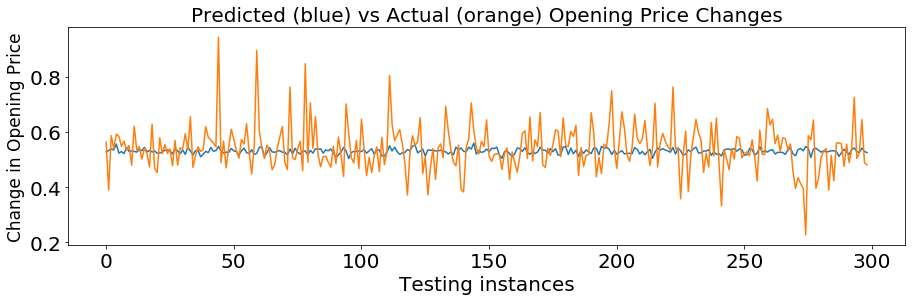

In [157]:
plt.figure(figsize=(15,4))
plt.plot(predictions)
plt.plot(y_test_news)
plt.title("Predicted (blue) vs Actual (orange) Opening Price Changes",fontsize = 20)
plt.xlabel("Testing instances",fontsize = 20)
plt.ylabel("Change in Opening Price",fontsize = 17)
plt.tick_params(axis='both',labelsize = 20)
plt.show()

In [121]:
# Create lists to measure if opening price increased or decreased
direction_pred = []
for pred in unnorm_predictions:
    if pred >= 0:
        direction_pred.append(1)
    else:
        direction_pred.append(0)
direction_test = []
for value in unnorm_y_test:
    if value >= 0:
        direction_test.append(1)
    else:
        direction_test.append(0)

In [122]:
# # Calculate if the predicted direction matched the actual direction
# direction = acc(direction_test, direction_pred)
# direction = round(direction,4)*100
# print("Predicted values matched the actual direction {}% of the time.".format(round(direction,2)))

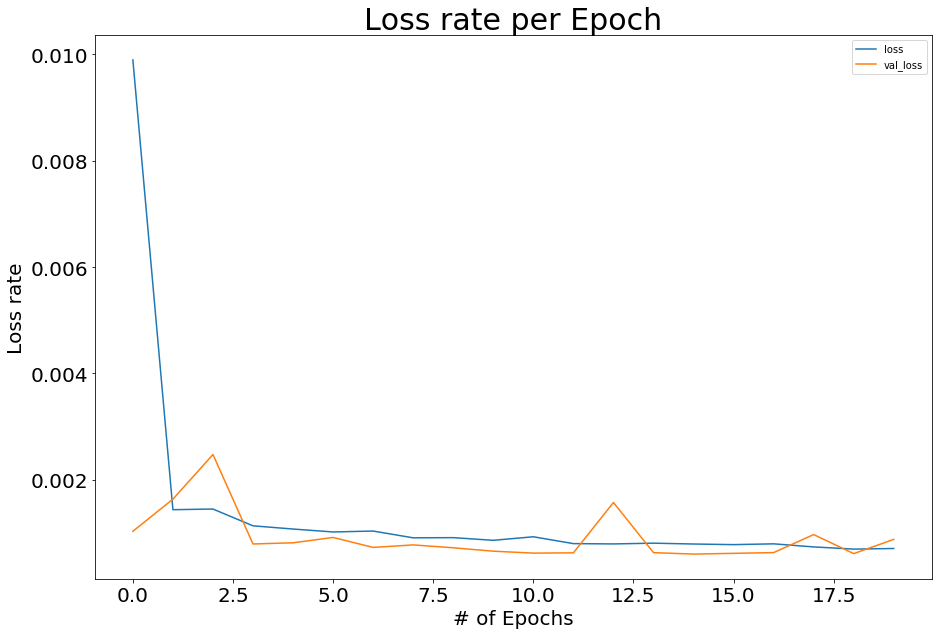

In [158]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss rate per Epoch', fontsize=30)
plt.ylabel('Loss rate',fontsize=20)
plt.xlabel('# of Epochs', fontsize=20)
plt.tick_params(axis='both',labelsize = 20)
plt.legend(loc='best')
plt.show()